# Vamos visualizar os dados de santander

## Grupos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
df_grupo = pd.read_csv('santander_grupos.csv')
df_grupo.head()

,codigo_grupo,modalidade,vl_bem_atual,nm_situ_grupo,data_info
0,8004,MOTO,17809.2,ANDAMENTO,2025-02-18 00:00:00.000
1,8004,MOTO,16761.6,ANDAMENTO,2025-02-18 00:00:00.000
2,8004,MOTO,15714.0,ANDAMENTO,2025-02-18 00:00:00.000
3,8004,MOTO,14666.4,ANDAMENTO,2025-02-18 00:00:00.000
4,8004,MOTO,13618.8,ANDAMENTO,2025-02-18 00:00:00.000


In [7]:
df_grupo.columns

Index(['codigo_grupo', 'modalidade', 'vl_bem_atual', 'nm_situ_grupo',
       'data_info'],
      dtype='object')

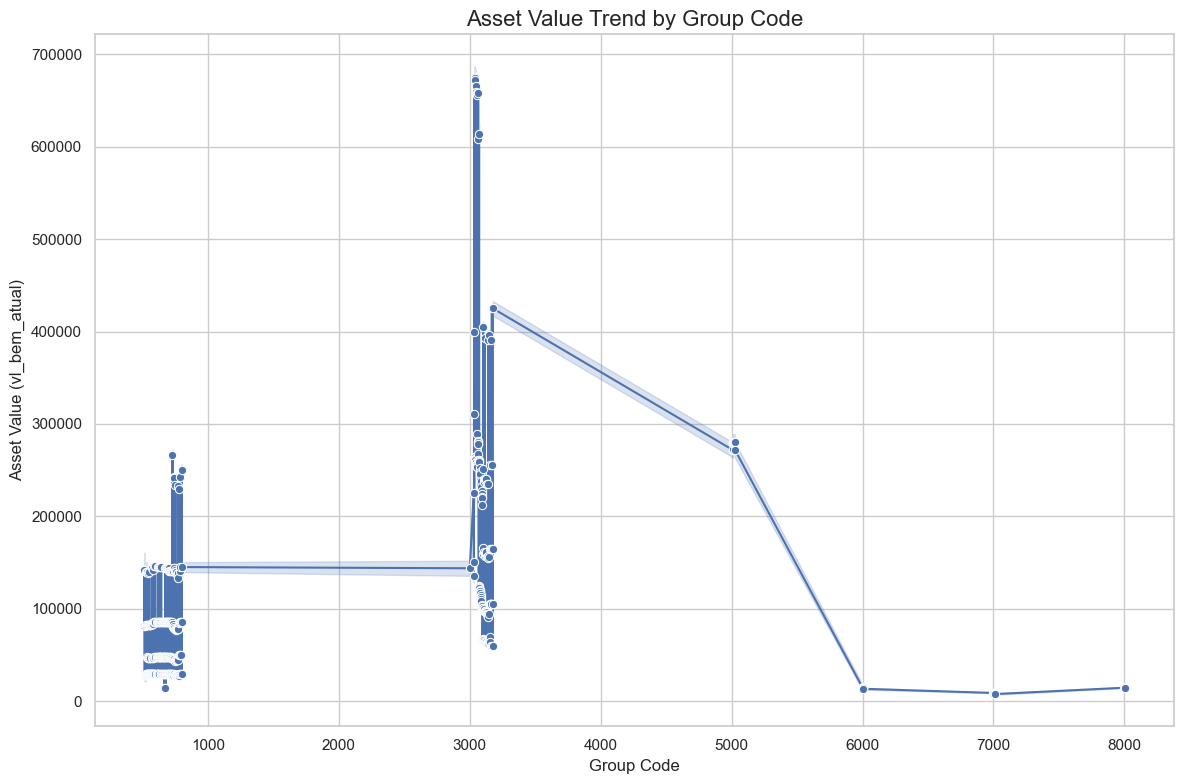

In [8]:
sns.set_theme(style="whitegrid")
# Plotting the line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='codigo_grupo', y='vl_bem_atual', marker='o', data=df_grupo, color='b')

# Adding labels and title
plt.title('Asset Value Trend by Group Code', fontsize=16)
plt.xlabel('Group Code')
plt.ylabel('Asset Value (vl_bem_atual)')
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Visualização de lances

In [11]:
df_lances = pd.read_csv('santander_lances.csv')
df_lances.head()

,codigo_grupo,vagas,dt_contmp,maior_lance,medio_lance,menor_lance,qtde_contmp,data_info
0,640,482,2021-11-05 00:00:00.000,0.76,0.38,0.30,66,2023-08-07 00:00:00.000
1,684,2,2022-12-06 00:00:00.000,0.62,0.48,0.30,33,2023-08-07 00:00:00.000
2,685,0,2022-12-06 00:00:00.000,0.69,0.51,0.44,23,2023-08-07 00:00:00.000
3,686,1179,2022-12-06 00:00:00.000,0.77,0.39,0.31,46,2023-08-07 00:00:00.000
4,687,81,2022-12-06 00:00:00.000,0.82,0.44,0.30,76,2023-08-07 00:00:00.000


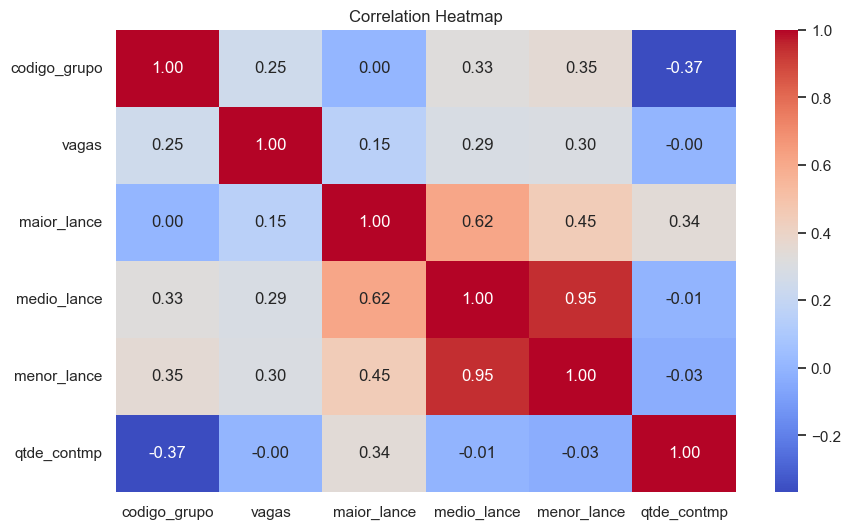

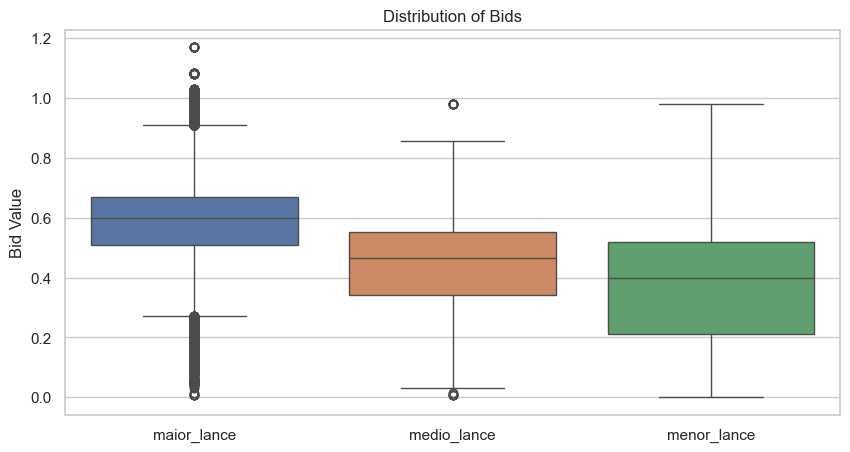

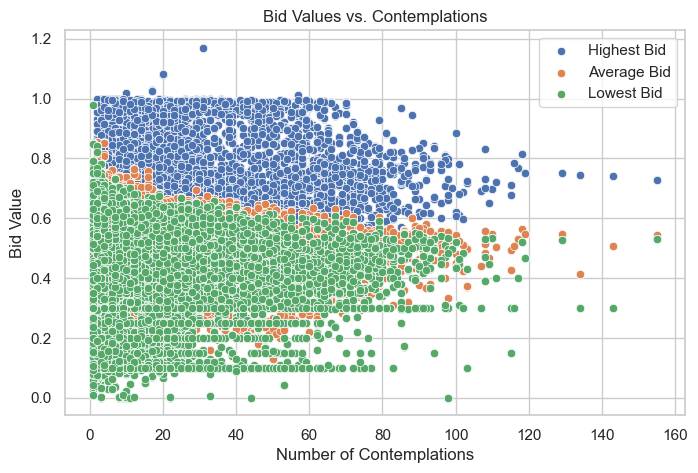

In [ ]:
df_numeric = df_lances.select_dtypes(include=["number"])  
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Box Plot of Bids
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_lances[["maior_lance", "medio_lance", "menor_lance"]])
plt.title("Distribution of Bids")
plt.ylabel("Bid Value")
plt.show()

# Scatter Plot: Bid Amounts vs. Number of Contemplations
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_lances["qtde_contmp"], y=df_lances["maior_lance"], label="Highest Bid")
sns.scatterplot(x=df_lances["qtde_contmp"], y=df_lances["medio_lance"], label="Average Bid")
sns.scatterplot(x=df_lances["qtde_contmp"], y=df_lances["menor_lance"], label="Lowest Bid")
plt.xlabel("Number of Contemplations")
plt.ylabel("Bid Value")
plt.title("Bid Values vs. Contemplations")
plt.legend()
plt.show()

In [18]:
df_sample = df_lances.sample(n=50, random_state=42)  # Select 50 random rows
df_lances["codigo_grupo_bin"] = pd.qcut(df_lances["codigo_grupo"], q=10)  # 10 bins
df_agg = df_lances.groupby("codigo_grupo_bin").agg({"maior_lance": "mean", "qtde_contmp": "mean"}).reset_index()


/var/folders/nd/0cfyb2fn46s7tqfdlzncgshm0000gp/T/ipykernel_43335/1112198011.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = df_lances.groupby("codigo_grupo_bin").agg({"maior_lance": "mean", "qtde_contmp": "mean"}).reset_index()


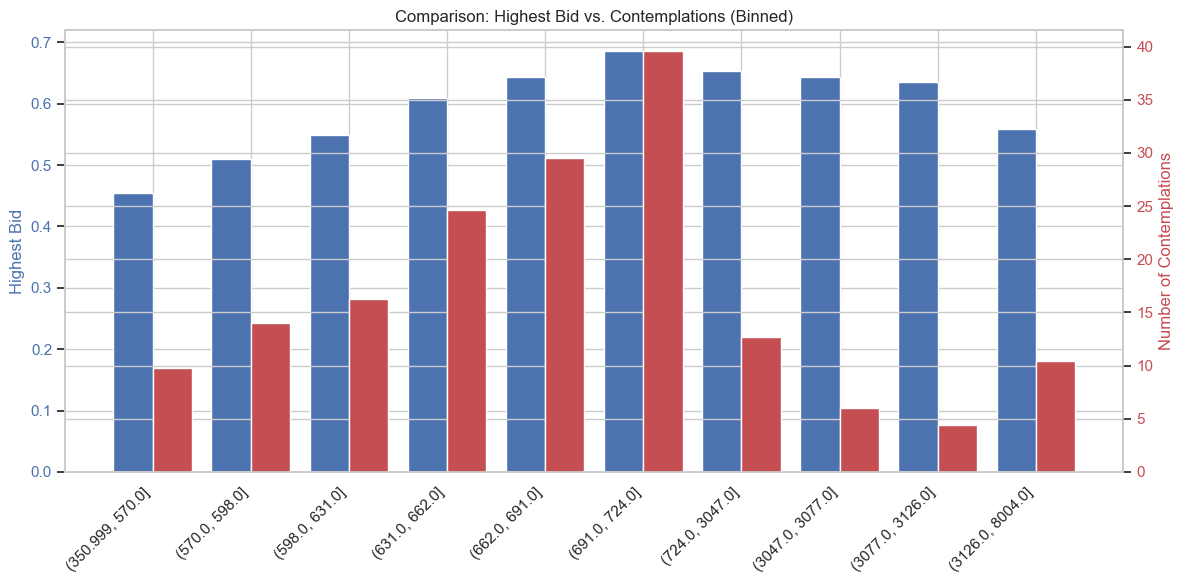

In [19]:
fig, ax1 = plt.subplots(figsize=(12, 6))

width = 0.4  
x = np.arange(len(df_agg))

ax1.bar(x - width/2, df_agg["maior_lance"], width=width, color="b", label="Highest Bid")
ax1.set_ylabel("Highest Bid", color="b")
ax1.tick_params(axis="y", labelcolor="b")

ax2 = ax1.twinx()
ax2.bar(x + width/2, df_agg["qtde_contmp"], width=width, color="r", label="Contemplations")
ax2.set_ylabel("Number of Contemplations", color="r")
ax2.tick_params(axis="y", labelcolor="r")

ax1.set_xticks(x)
ax1.set_xticklabels(df_agg["codigo_grupo_bin"], rotation=45, ha="right")

plt.title("Comparison: Highest Bid vs. Contemplations (Binned)")
fig.tight_layout()
plt.show()


# Cotas pre

In [44]:
santander_cotas_pre_df = pd.read_csv('santander_cotas_pre.csv', low_memory=False)
santander_cotas_pre_df.head()

,codigo_grupo,codigo_quota,vl_devolver,vl_bem_atual,pc_fc_pago,dt_canc,dt_venda,pz_restante_grupo,qt_parcela_a_pagar,pc_fr_pago,...,dt_entrega_bem,dt_contemplacao,vl_lance_embutido,vl_bem_corrigido,vl_total_contrato,vl_bem_entregue,vl_bem_a_entregar,pc_seguro,vl_lance_proprio,qt_pc_atraso
0,3094,819,239.35,66540.90,0.4497,2022-03-14 00:00:00.000,2021-09-17 00:00:00.000,159,179,0.0281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,719,165,631.77,79347.77,0.9952,2022-01-04 00:00:00.000,2021-09-24 00:00:00.000,51,70,0.0964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,719,166,11766.96,82530.00,17.8222,2023-05-15 00:00:00.000,2021-09-24 00:00:00.000,51,56,0.7690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,719,168,3197.95,101745.40,3.9289,2022-09-30 00:00:00.000,2021-09-24 00:00:00.000,51,64,0.3824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,719,170,661.65,84782.54,0.9754,2022-04-12 00:00:00.000,2021-09-24 00:00:00.000,51,70,0.0944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/nd/0cfyb2fn46s7tqfdlzncgshm0000gp/T/ipykernel_43335/331409779.py:1: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  santander_cotas_pre_df = pd.read_csv('santander_cotas_pre.csv')


        codigo_grupo   codigo_quota    vl_devolver   vl_bem_atual  \
count  545427.000000  545427.000000  545427.000000  545427.000000   
mean     1756.749961     783.224831    2517.047443  111258.791405   
min       517.000000       1.000000       0.000000    5000.000000   
25%       684.000000     282.000000       0.000000   38007.000000   
50%       728.000000     597.000000     495.280000   70000.000000   
75%      3088.000000    1047.000000    1969.170000  131200.000000   
max      8004.000000    3000.000000  303795.740000  930901.370000   
std      1440.355203     665.502158    7337.014772  119382.504435   

          pc_fc_pago                        dt_canc  \
count  535750.000000                         368409   
mean       11.867009  2022-01-03 13:20:07.856485120   
min        -3.654500            2017-01-11 00:00:00   
25%         0.936200            2021-03-16 00:00:00   
50%         3.091150            2022-03-14 00:00:00   
75%        12.887800            2023-02-13 00:00

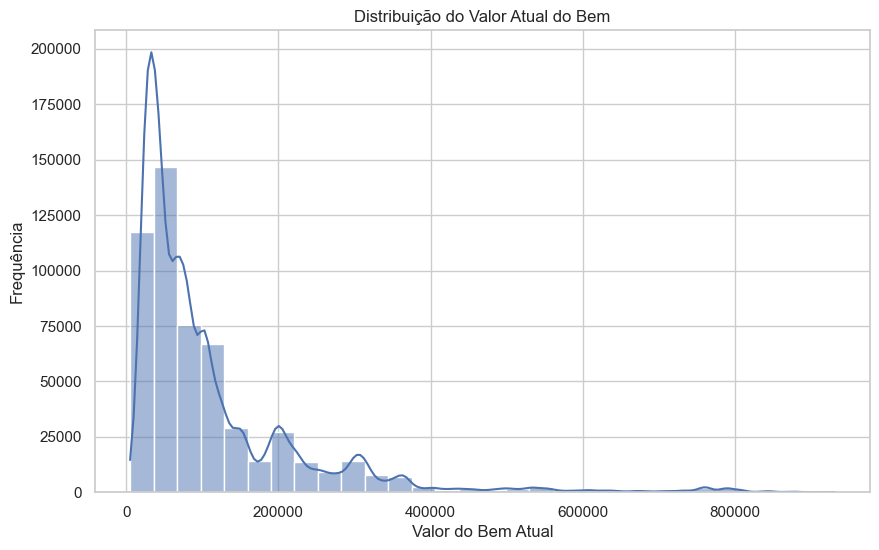

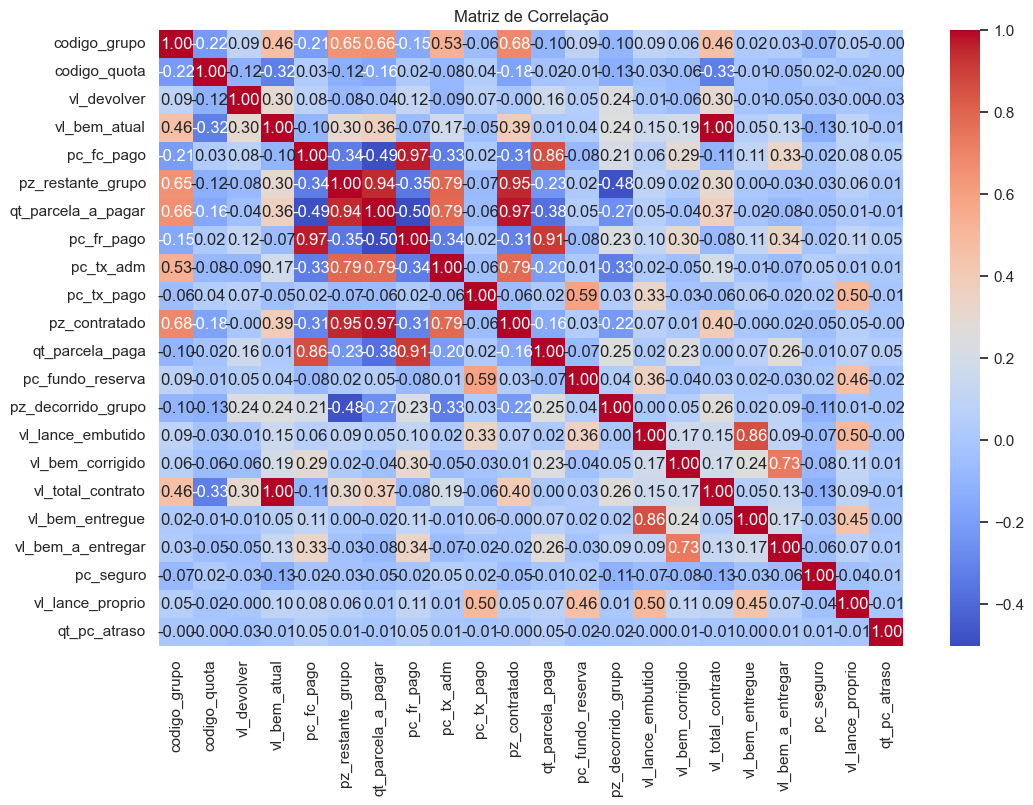

In [ ]:

# Converter colunas de datas para o formato datetime
date_cols = ["dt_canc", "dt_venda", "dt_entrega_bem", "dt_contemplacao"]
for col in date_cols:
    santander_cotas_pre_df[col] = pd.to_datetime(santander_cotas_pre_df[col], errors='coerce')

# Estatísticas básicas
print(santander_cotas_pre_df.describe())

# Distribuição dos valores de bens
plt.figure(figsize=(10, 6))
sns.histplot(santander_cotas_pre_df["vl_bem_atual"], bins=30, kde=True)
plt.title("Distribuição do Valor Atual do Bem")
plt.xlabel("Valor do Bem Atual")
plt.ylabel("Frequência")
plt.show()

# Correlação entre valores
plt.figure(figsize=(12, 8))
sns.heatmap(santander_cotas_pre_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Cotas Pos

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cotas_pos_df = pd.read_csv("santander_cotas_pos.csv")

In [33]:
cotas_pos_df.head()

,codigo_grupo,codigo_quota,vl_devolver,vl_bem_atual,dt_pgto_pri_parcela,mes_canc,pc_tx_adm,pc_pago_contrato,ativo,dt_entrega_bem,dt_contemplacao,vl_saldo_devedor,vl_lance_total,vl_lance_embutido,data_info
0,687,2119,0.00,63367.50,2021-07-19 00:00:00.000,NaN,14.00,98.15,1,NaN,2023-09-06 00:00:00.000,1370.83,33588.84,21462.47,2023-11-27 13:54:06.992
1,687,2124,0.00,38007.00,2020-09-04 00:00:00.000,NaN,14.00,100.00,1,NaN,2022-12-06 00:00:00.000,-3.88,27504.82,11981.57,2023-11-27 13:54:06.992
2,687,1920,0.00,32106.20,2020-10-15 00:00:00.000,NaN,5.25,44.74,1,NaN,NaN,18476.80,NaN,NaN,2023-11-27 13:54:06.992
3,598,755,11852.97,145449.37,2019-06-26 00:00:00.000,202004.0,14.00,10.19,0,NaN,NaN,149233.38,NaN,NaN,2023-11-27 13:54:06.992
4,687,1919,10599.68,48995.00,2020-10-14 00:00:00.000,202211.0,14.00,27.04,0,NaN,NaN,40322.15,NaN,NaN,2023-11-27 13:54:06.992


In [30]:
grupo_counts = cotas_pos_df.groupby('codigo_grupo').size().sort_values(ascending=False)
print(grupo_counts)

codigo_grupo
655     1165
640     1145
687     1108
700     1086
696     1073
        ... 
479        2
391        2
2081       2
383        2
3080       1
Length: 504, dtype: int64


In [38]:
cotas_pos_df['codigo_grupo'] = pd.to_numeric(cotas_pos_df['codigo_grupo'], errors='coerce')
cotas_pos_df['codigo_grupo'] = cotas_pos_df['codigo_grupo'].astype(str)
cotas_pos_df['codigo_grupo'] = cotas_pos_df['codigo_grupo'].str.strip()
filtered_df = cotas_pos_df[cotas_pos_df['codigo_grupo'] == '655']
filtered_df

,codigo_grupo,codigo_quota,vl_devolver,vl_bem_atual,dt_pgto_pri_parcela,mes_canc,pc_tx_adm,pc_pago_contrato,ativo,dt_entrega_bem,dt_contemplacao,vl_saldo_devedor,vl_lance_total,vl_lance_embutido,data_info
721,655,52,2660.36,37179.21,2020-03-13 00:00:00.000,202104.0,12.75,8.94,0,NaN,NaN,38436.28,NaN,NaN,2023-11-27 13:54:06.992
723,655,2999,0.00,31495.50,2020-05-15 00:00:00.000,NaN,13.60,38.27,1,NaN,NaN,21238.99,NaN,NaN,2023-11-27 13:54:06.992
724,655,655,0.00,24497.50,2020-03-23 00:00:00.000,NaN,12.75,46.19,1,NaN,NaN,14956.70,NaN,NaN,2023-11-27 13:54:06.992
725,655,554,0.00,24497.50,2020-09-15 00:00:00.000,NaN,16.00,91.32,1,NaN,2023-10-05 00:00:00.000,2202.33,12020.75,8346.12,2023-11-27 13:54:06.992
726,655,396,2748.44,37179.21,2020-06-01 00:00:00.000,202102.0,12.75,9.24,0,NaN,NaN,38316.30,NaN,NaN,2023-11-27 13:54:06.992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79509,655,2152,0.00,20017.80,2020-07-31 00:00:00.000,NaN,7.50,100.00,1,2024-01-30 00:00:00.000,2023-07-06 00:00:00.000,-0.04,7968.43,3779.38,2025-01-20 22:28:26.734
80229,655,892,0.00,27222.50,2020-07-02 00:00:00.000,NaN,150.00,98.42,1,NaN,2024-12-05 00:00:00.000,494.01,13064.64,8907.71,2025-01-20 22:28:26.734
80230,655,909,3430.04,40189.00,2022-01-31 00:00:00.000,202205.0,170.00,10.67,0,NaN,NaN,42861.41,NaN,NaN,2025-01-20 22:28:26.734
80231,655,912,1762.96,40189.00,2022-01-25 00:00:00.000,202212.0,7.50,5.48,0,NaN,NaN,41993.57,NaN,NaN,2025-01-20 22:28:26.734


In [39]:
# Check if 'mes_canc' has a value (indicating cancellation)
filtered_df['canceled'] = filtered_df['mes_canc'].notna()

# Calculate the cancellation rate
cancellation_rate = (filtered_df['canceled'].sum() / filtered_df.shape[0]) * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")


Cancellation Rate: 68.07%


/var/folders/nd/0cfyb2fn46s7tqfdlzncgshm0000gp/T/ipykernel_43335/3457498795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['canceled'] = filtered_df['mes_canc'].notna()


In [40]:
total_value = filtered_df['vl_bem_atual'].sum()
average_value = filtered_df['vl_bem_atual'].mean()
print(f"Total Value of Assets: {total_value:.2f}")
print(f"Average Value of Asset: {average_value:.2f}")


Total Value of Assets: 32776037.29
Average Value of Asset: 28133.94


In [41]:
# Convert to datetime
filtered_df['dt_pgto_pri_parcela'] = pd.to_datetime(filtered_df['dt_pgto_pri_parcela'], errors='coerce')
filtered_df['mes_canc'] = pd.to_datetime(filtered_df['mes_canc'], format='%Y%m', errors='coerce')  # assuming mes_canc is in 'YYYYMM' format
canceled_quotas = filtered_df[filtered_df['mes_canc'].notna()]
# Calculate the difference in days
canceled_quotas['cancellation_diff'] = (canceled_quotas['mes_canc'] - canceled_quotas['dt_pgto_pri_parcela']).dt.days

# Display the difference for analysis
print(canceled_quotas[['codigo_grupo', 'codigo_quota', 'dt_pgto_pri_parcela', 'mes_canc', 'cancellation_diff']])
# Calculate the difference in days
canceled_quotas['cancellation_diff'] = (canceled_quotas['mes_canc'] - canceled_quotas['dt_pgto_pri_parcela']).dt.days

# Display the difference for analysis
print(canceled_quotas[['codigo_grupo', 'codigo_quota', 'dt_pgto_pri_parcela', 'mes_canc', 'cancellation_diff']])


      codigo_grupo  codigo_quota dt_pgto_pri_parcela   mes_canc  \
721            655            52          2020-03-13 2021-04-01   
726            655           396          2020-06-01 2021-02-01   
963            655          2567          2020-04-23 2020-10-01   
964            655          2506          2020-09-16 2021-08-01   
965            655          2458          2020-04-22 2022-08-01   
...            ...           ...                 ...        ...   
79507          655          1870          2020-04-15 2022-07-01   
79508          655          1869          2020-04-15 2021-05-01   
80230          655           909          2022-01-31 2022-05-01   
80231          655           912          2022-01-25 2022-12-01   
80232          655           913          2022-01-25 2022-11-01   

       cancellation_diff  
721                  384  
726                  245  
963                  161  
964                  319  
965                  831  
...                  ...  
79507 

/var/folders/nd/0cfyb2fn46s7tqfdlzncgshm0000gp/T/ipykernel_43335/1249837383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['dt_pgto_pri_parcela'] = pd.to_datetime(filtered_df['dt_pgto_pri_parcela'], errors='coerce')
/var/folders/nd/0cfyb2fn46s7tqfdlzncgshm0000gp/T/ipykernel_43335/1249837383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['mes_canc'] = pd.to_datetime(filtered_df['mes_canc'], format='%Y%m', errors='coerce')  # assuming mes_canc is in 'YYYYMM' format
/var/folde

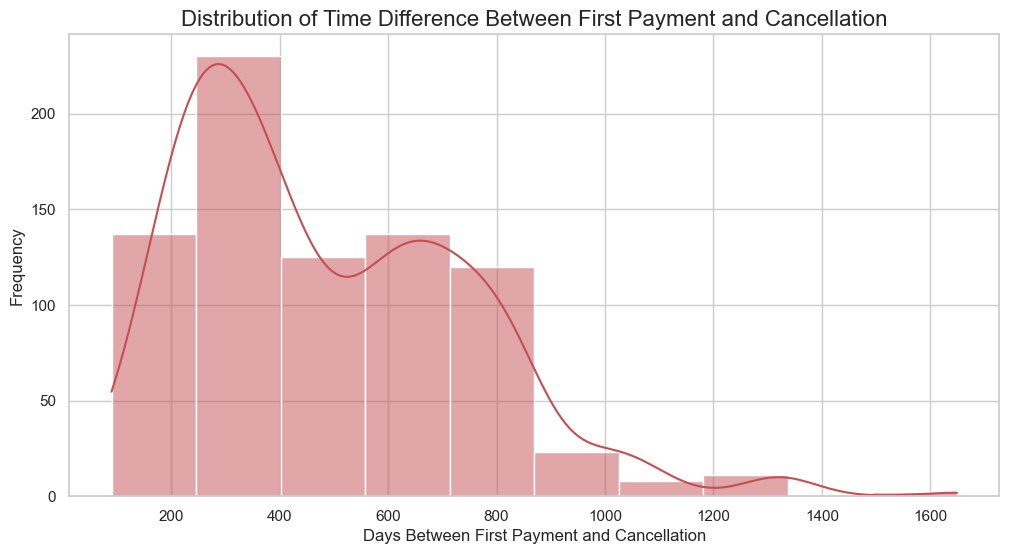

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(canceled_quotas['cancellation_diff'], kde=True, color='r', bins=10)
plt.title('Distribution of Time Difference Between First Payment and Cancellation', fontsize=16)
plt.xlabel('Days Between First Payment and Cancellation')
plt.ylabel('Frequency')
plt.show()

       codigo_grupo  codigo_quota    vl_devolver   vl_bem_atual  \
count  86152.000000  86152.000000   86152.000000   86152.000000   
mean    1002.102308    768.592360    6021.506454   85627.451135   
min      351.000000      1.000000       0.000000    5150.000000   
25%      618.000000    281.000000       0.000000   32620.240000   
50%      672.000000    595.000000    2507.450000   46246.000000   
75%      710.000000    940.000000    6578.167500   83950.350000   
max     8003.000000   3000.000000  237674.870000  875449.520000   
std     1092.786658    674.994159   11060.131143  108349.672954   

                 dt_pgto_pri_parcela       mes_canc     pc_tx_adm  \
count                          86152   65236.000000  86152.000000   
mean   2020-08-06 19:18:00.434580736  202137.453339     47.852688   
min              2013-07-05 00:00:00  201505.000000      4.500000   
25%              2019-08-19 00:00:00  202011.000000     14.000000   
50%              2020-08-03 00:00:00  202112.000000

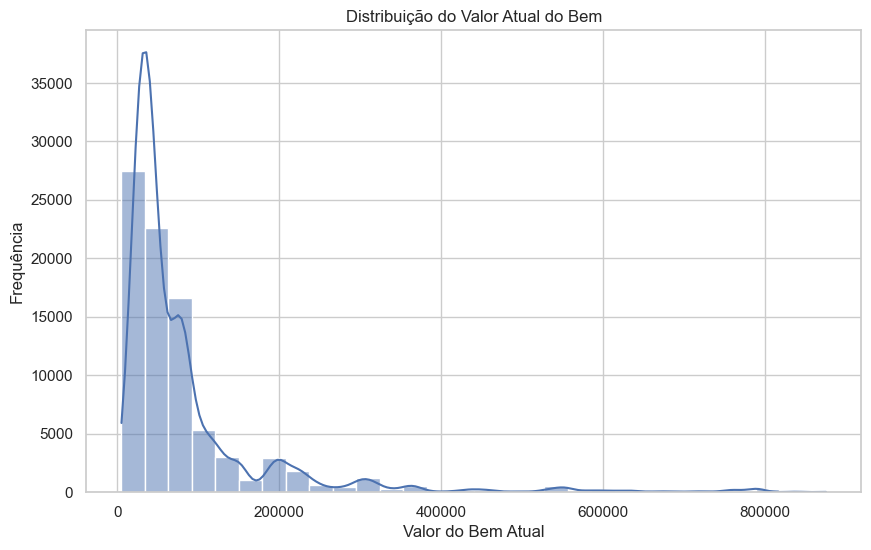

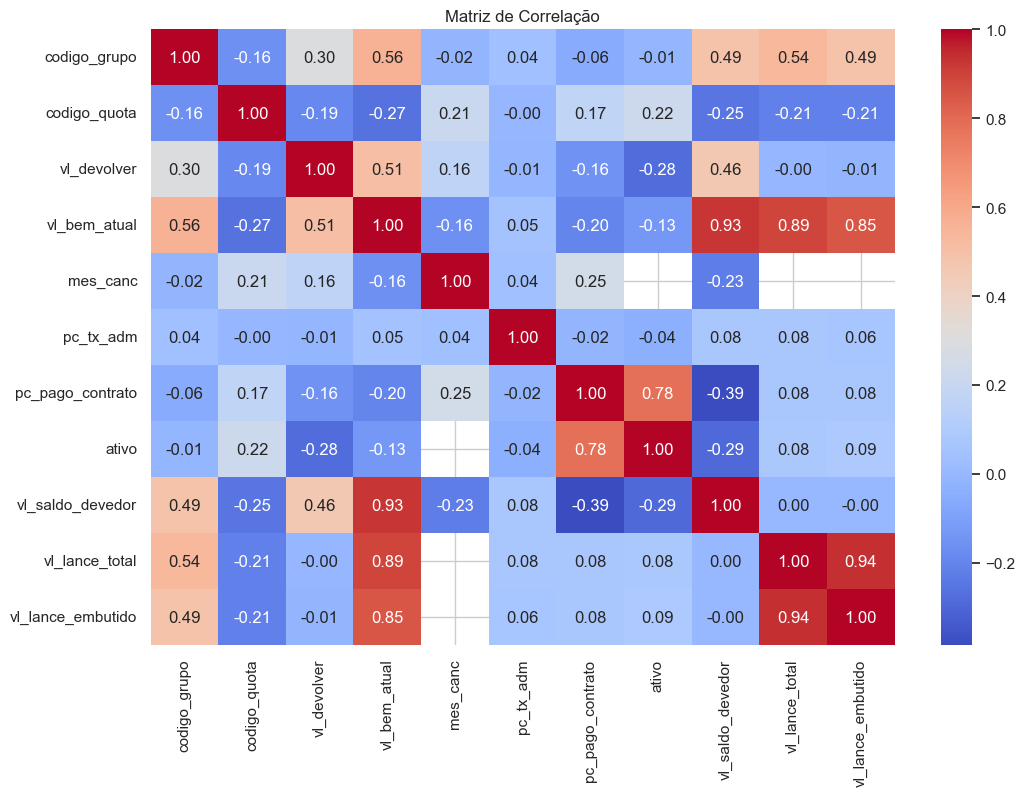

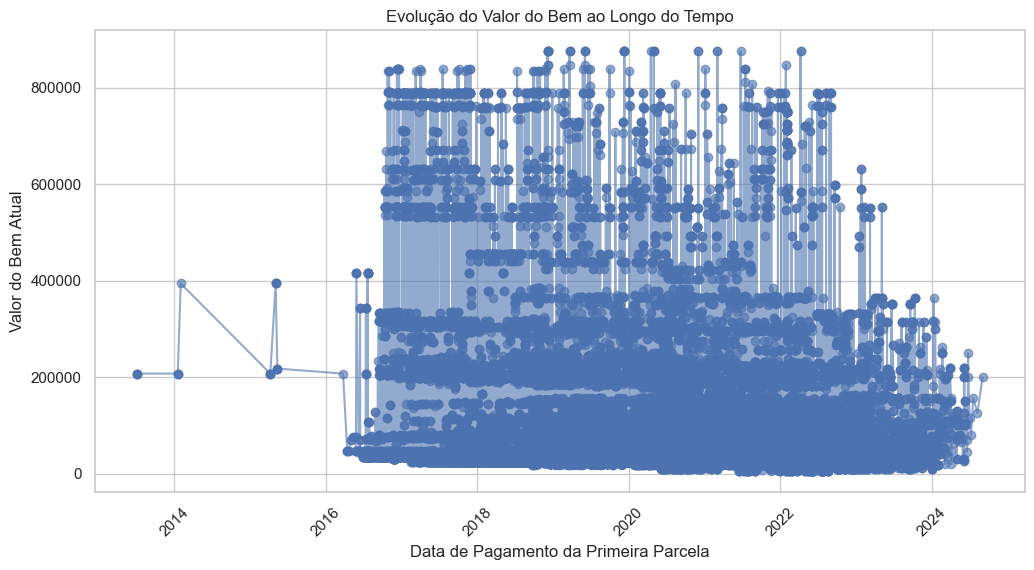

/var/folders/nd/0cfyb2fn46s7tqfdlzncgshm0000gp/T/ipykernel_43335/1952874156.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cotas_pos_df["ativo"], palette="coolwarm")


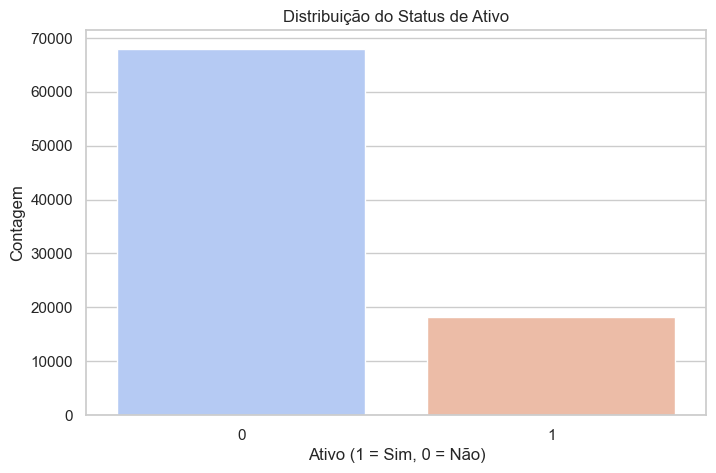

/var/folders/nd/0cfyb2fn46s7tqfdlzncgshm0000gp/T/ipykernel_43335/1952874156.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ativo_percentual.index, y=ativo_percentual.values, palette="coolwarm")


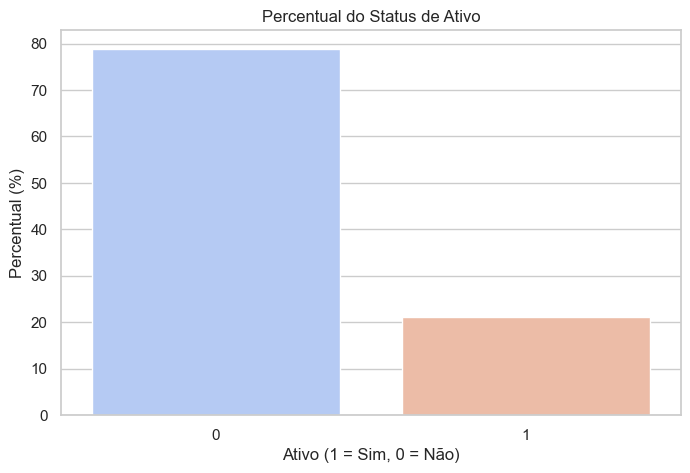

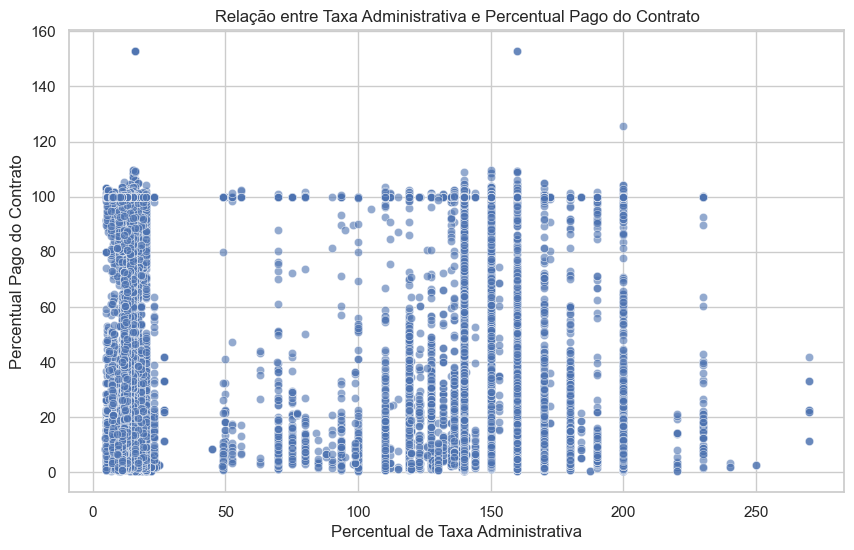

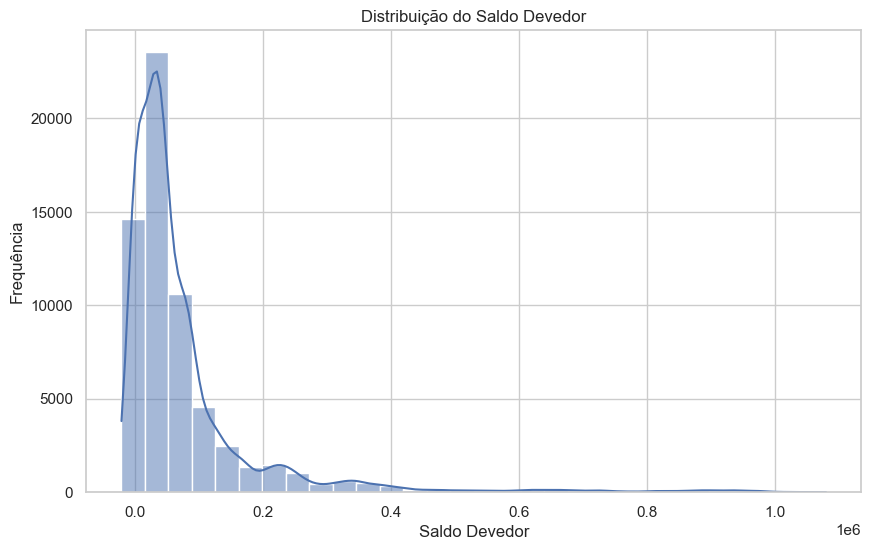

In [27]:


# Converter colunas de datas para o formato datetime
date_cols = ["dt_pgto_pri_parcela", "dt_entrega_bem", "dt_contemplacao", "data_info"]
for col in date_cols:
    cotas_pos_df[col] = pd.to_datetime(cotas_pos_df[col], errors='coerce')

# Estatísticas básicas
print(cotas_pos_df.describe())

# Distribuição dos valores de bens
plt.figure(figsize=(10, 6))
sns.histplot(cotas_pos_df["vl_bem_atual"], bins=30, kde=True)
plt.title("Distribuição do Valor Atual do Bem")
plt.xlabel("Valor do Bem Atual")
plt.ylabel("Frequência")
plt.show()

# Correlação entre valores
plt.figure(figsize=(12, 8))
sns.heatmap(cotas_pos_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Evolução do valor do bem ao longo do tempo
plt.figure(figsize=(12, 6))
df_sorted = cotas_pos_df.sort_values("dt_pgto_pri_parcela")
plt.plot(df_sorted["dt_pgto_pri_parcela"], df_sorted["vl_bem_atual"], marker="o", linestyle="-", alpha=0.6)
plt.title("Evolução do Valor do Bem ao Longo do Tempo")
plt.xlabel("Data de Pagamento da Primeira Parcela")
plt.ylabel("Valor do Bem Atual")
plt.xticks(rotation=45)
plt.show()
# Análise de status de ativos
plt.figure(figsize=(8, 5))
sns.countplot(x=cotas_pos_df["ativo"], palette="coolwarm")
plt.title("Distribuição do Status de Ativo")
plt.xlabel("Ativo (1 = Sim, 0 = Não)")
plt.ylabel("Contagem")
plt.show()

# Percentual de status de ativos
ativo_percentual = cotas_pos_df["ativo"].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=ativo_percentual.index, y=ativo_percentual.values, palette="coolwarm")
plt.title("Percentual do Status de Ativo")
plt.xlabel("Ativo (1 = Sim, 0 = Não)")
plt.ylabel("Percentual (%)")
plt.show()

# Comparação entre taxa administrativa e percentual pago do contrato
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cotas_pos_df["pc_tx_adm"], y=cotas_pos_df["pc_pago_contrato"], alpha=0.6)
plt.title("Relação entre Taxa Administrativa e Percentual Pago do Contrato")
plt.xlabel("Percentual de Taxa Administrativa")
plt.ylabel("Percentual Pago do Contrato")
plt.show()

# Análise do saldo devedor
plt.figure(figsize=(10, 6))
sns.histplot(cotas_pos_df["vl_saldo_devedor"], bins=30, kde=True)
plt.title("Distribuição do Saldo Devedor")
plt.xlabel("Saldo Devedor")
plt.ylabel("Frequência")
plt.show()
